Okay I still should check that boltzmann stuff is working properly before doing the Q-values, so try running the boltzmann on the reward matrix rather than the q values and check that it gives you the distribution you'd expect just to make sure I'm not messing anything up there. 

Then if that's all fine, which it probably is, have another look at the Q-value and V-Value calculations in learn, and if they look right then step through and check that it's doing what I expect them to be doing. 

If it's something wrong with one of those then that might fix the learning side of things as well, but at least we'll have a proper trajectory to learn from because atm the one it's creating, and the resulting policy is abysmal, so fix that first, get the expert to perform more expertly and then you can check to see if there are problems with the learning algorithm :) 

Issue has to be in policy iteration somewhere 

In [22]:
%reload_ext autoreload
from env import SingleStateSpace 
from generate_trajectory import generate_trajectory
from policy import Boltzmann 
from learn import compute_q_with_values
from RewardFunctions import SingleStateReward
import numpy as np 
from learn import policy_iteration
from utils import normalise_pi
from policy_walk import policy_walk 
import matplotlib.pyplot as plt 

In [23]:

trajectory_length = 20 
#set up the agent and their policy 
env = SingleStateSpace(n_actions = 10, discount_rate = 0.1, R_max = 5)
#so we have access to env.reward
observation_times = np.cumsum(np.random.uniform(0, 2, size=trajectory_length))
print("Generated observation times:") 
print(observation_times)

# Use meshgrid to create a grid of all possible combinations of s, a, and t
s_grid, a_grid, t_grid = np.meshgrid(env.states, env.actions, observation_times, indexing='ij')
R = np.vectorize(env.reward)(s_grid,a_grid,t_grid)


# Calculate the reward for each combination using vectorized operations - oh I'm not actually using a boltzmann policy here I'm just using a normalised reward vector? 
(optimal_pi, optimal_values, optimal_q_values) = policy_iteration(env, len(observation_times), R)

b = Boltzmann(optimal_q_values, env.actions, alpha = 0.5)
observations = generate_trajectory(env,b,observation_times)
# observations = [] 
# for i in range(20):
#     observations.append([0,0,i])

print("Generated trajectory") 
print(observations)

#is it not cheating if it knows the optimal q_values in order to do the boltzmann likelihood calculation. 
#I think I might be doing something wrong there.
learned_rewards = policy_walk(env,observations,n_iters=1000)[999:1000]
policy_walk_iters = 200
for _ in range(policy_walk_iters-1): 
    learned_rewards = np.concatenate((learned_rewards, policy_walk(env,observations,n_iters=1000)[999:1000]))

Generated observation times:
[ 0.31733116  1.9972529   3.14610195  3.56183356  5.51161268  7.29554042
  9.21672727 10.09853132 11.39802437 11.53342982 12.06960959 13.34553818
 14.62448859 14.67481381 15.55206067 15.73647745 15.9132336  17.73012529
 18.87243731 20.18957889]
Generated trajectory
[[0, 0, 0], [0, 6, 1], [0, 2, 2], [0, 6, 3], [0, 6, 4], [0, 5, 5], [0, 4, 6], [0, 0, 7], [0, 3, 8], [0, 0, 9], [0, 4, 10], [0, 6, 11], [0, 7, 12], [0, 5, 13], [0, 0, 14], [0, 5, 15], [0, 5, 16], [0, 1, 17], [0, 2, 18], [0, 1, 19]]


In [24]:
print(learned_rewards.shape)

(200, 1, 10, 20)


[ 0.31733116  1.9972529   3.14610195  3.56183356  5.51161268  7.29554042
  9.21672727 10.09853132 11.39802437 11.53342982 12.06960959 13.34553818
 14.62448859 14.67481381 15.55206067 15.73647745 15.9132336  17.73012529
 18.87243731 20.18957889]


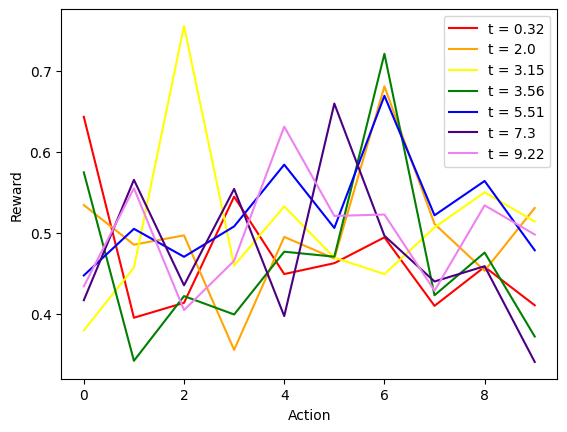

In [25]:
avg_reward = np.average(np.asarray(learned_rewards),axis = 0)
print(observation_times)
colors = ["red", "orange","yellow","green","blue","indigo","violet"]
for t in range(7):
    label = "t = " + format(round(observation_times[t],2))
    plt.plot(avg_reward[0,:,t], color=colors[t], label = label)
plt.ylabel("Reward")
plt.xlabel("Action")
plt.legend()
plt.show()

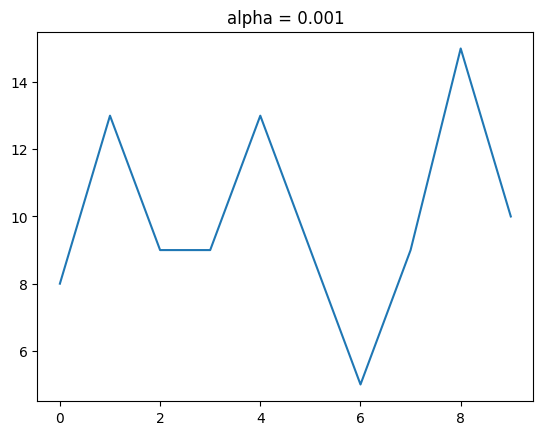

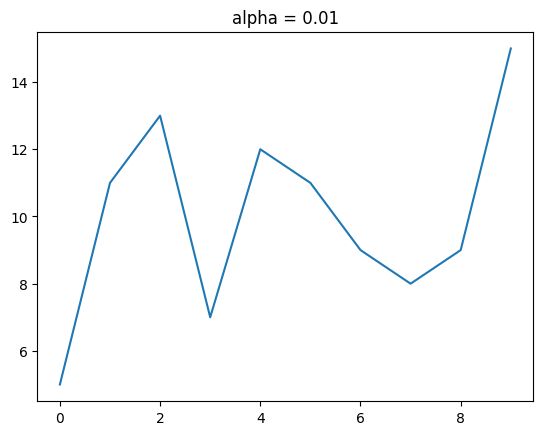

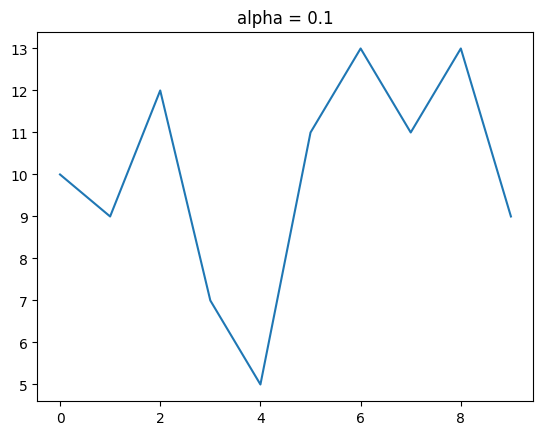

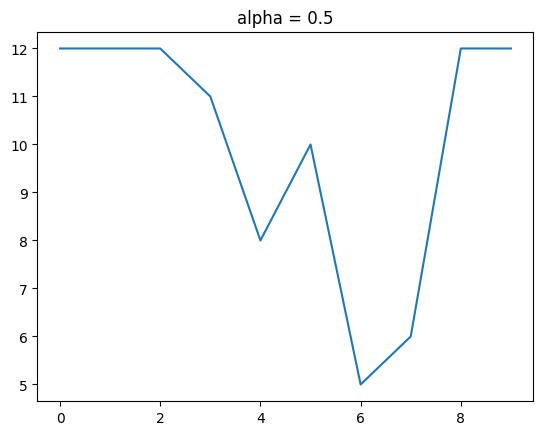

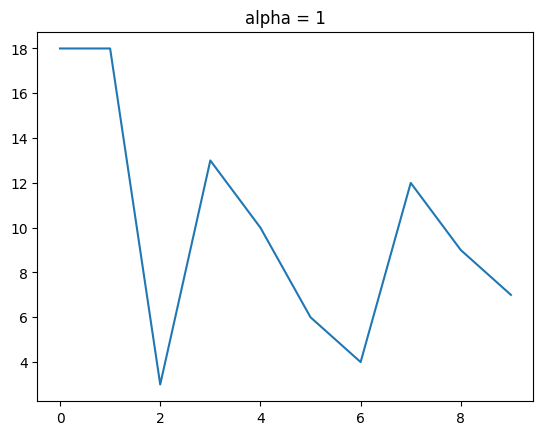

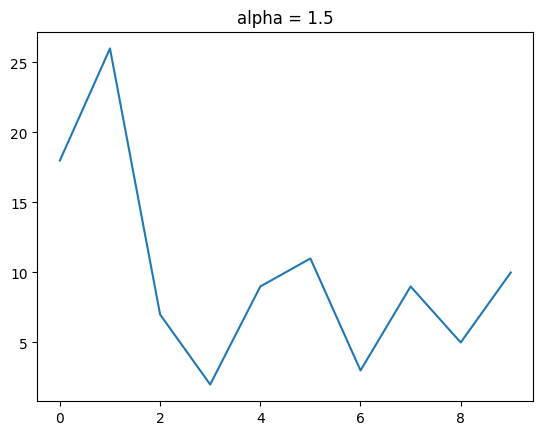

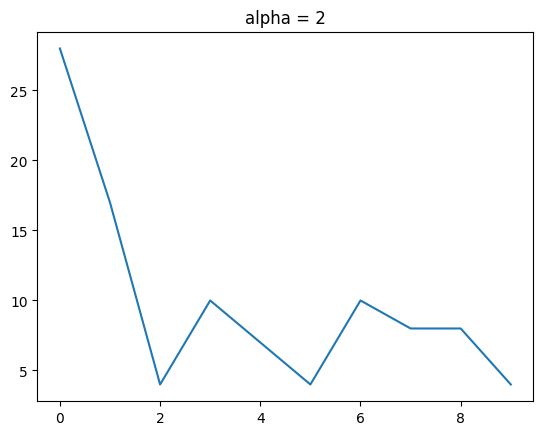

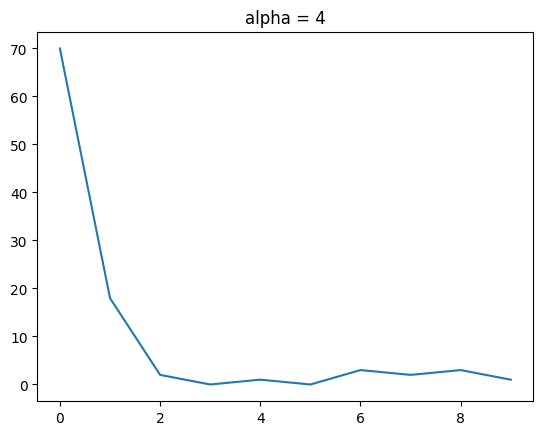

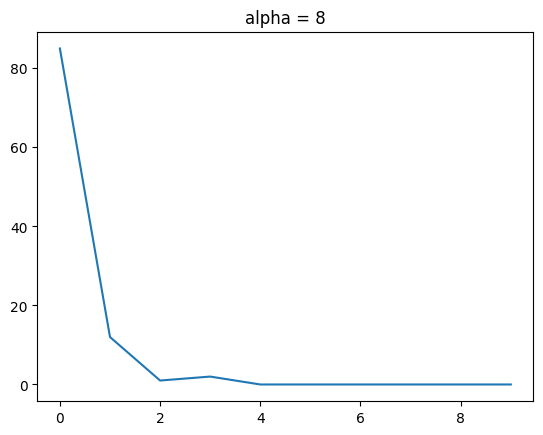

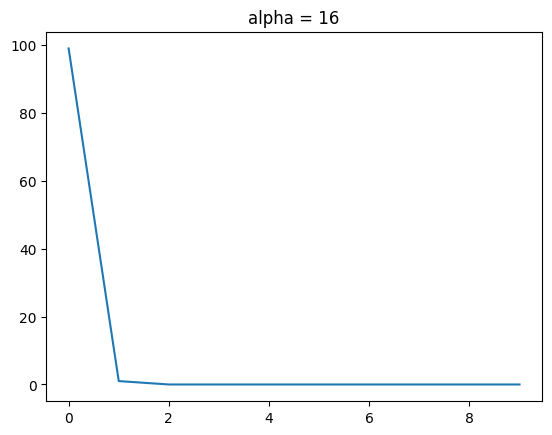

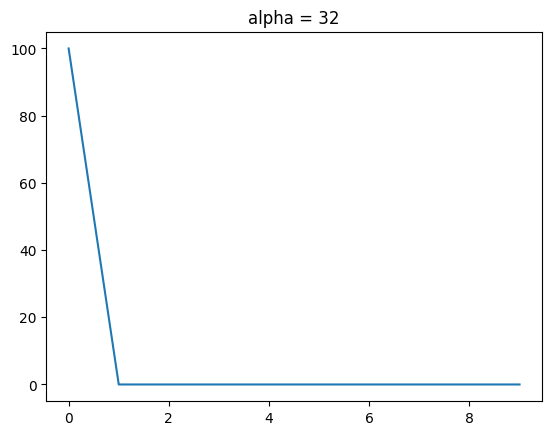

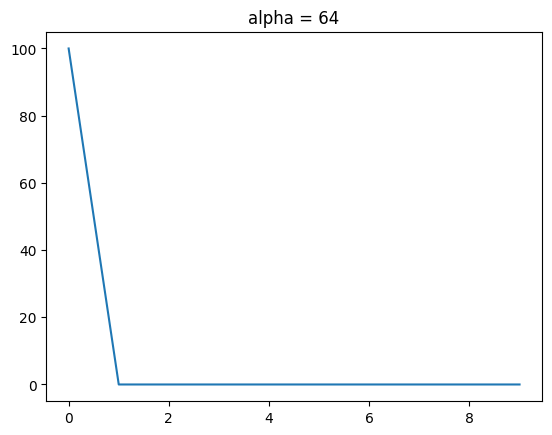

In [26]:

b = Boltzmann(optimal_q_values, env.actions)

#What is my initial policy? Everywhere I've seen, boltzmann is defined using the Q-values but you
#need a policy to find the Q-values so what is the actual policy? 
#Is it just like an exponential style distribution over the rewards? 
# observations = generate_trajectory(env, boltzmann_policy, observation_times)

alphas = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 4, 8, 16, 32, 64]
for alpha in alphas: 
    b = Boltzmann(optimal_q_values,env.actions,alpha) 
    
    count = np.zeros(env.n_actions)
    for i in range(100): 
        count[b(0,0)] += 1
    plt.plot(count) 
    asd = "alpha = " + format(alpha)
    plt.title(asd)
    plt.show()